#### 라이브러리 정의

In [131]:
### 데이터 처리
import pandas as pd

### 시각화 처리
# - 파이썬에서 사용되는 기본 시각화 라이브러리
import matplotlib.pyplot as plt

# - 히트맵 라이브러리
import seaborn as sns

# - 한글처리
plt.rc("font", family="NanumGothic")

# 마이너스 기호 깨짐 처리
plt.rcParams["axes.unicode_minus"] = False 

#### 통합 데이터 읽어들이기

In [132]:
### 데이터 프레임 변수명 : df_bus_card_tot

file_path = "./02_data_all/df_bus_card_tot.csv"

df_bus_card_tot = pd.read_csv(file_path, sep=",")
df_bus_card_tot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842608 entries, 0 to 842607
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   승차시각        842608 non-null  object 
 1   하차시각        842608 non-null  object 
 2   승객연령        841683 non-null  object 
 3   승차정류장       842608 non-null  object 
 4   하차정류장       842608 non-null  object 
 5   기준년도        842608 non-null  int64  
 6   기준월         842608 non-null  int64  
 7   기준일         842608 non-null  int64  
 8   기준시간        842608 non-null  int64  
 9   기준분         842608 non-null  int64  
 10  버스내체류시간(분)  842608 non-null  float64
 11  승하차구간       842608 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 77.1+ MB


#### 소주제별 현황 분석 및 시각화 하기

In [133]:
df_bus_card_tot["기준년도"].unique()

array([2020], dtype=int64)

In [134]:
df_fillter = df_bus_card_tot["버스내체류시간(분)"]
df_fillter

0          7.92
1         32.18
2          3.68
3         34.48
4          4.48
          ...  
842603    17.35
842604    40.35
842605     8.15
842606    14.28
842607     6.83
Name: 버스내체류시간(분), Length: 842608, dtype: float64

In [135]:
# 집계
temp = df_bus_card_tot.pivot_table(
    index="승하차구간", 
    values="버스내체류시간(분)", 
    aggfunc="sum")

# 정렬하기
# 내림차순 : 높은값 부터 낮은값 (descending, DESC, ascending=False)
temp = temp.sort_values("버스내체류시간(분)", ascending=False)

# 상위 15개만
temp = temp.head(15)

### 행 인덱스 값(보이는 인덱스 값)을 컬럼으로 사용하기
# - 인덱스를 컬럼으로 변경하기

## 처리한 데이터프레임의 결과를 변수에 담지않고 직접 메모리에 저장시키는 방법
# - inplace=True를 파라미터로 정의
temp.reset_index(inplace=True)

# 버스내체류시간 평균값 구하기
sum = temp["버스내체류시간(분)"].sum()
avg = sum / len(temp)

avg


45077.02466666667

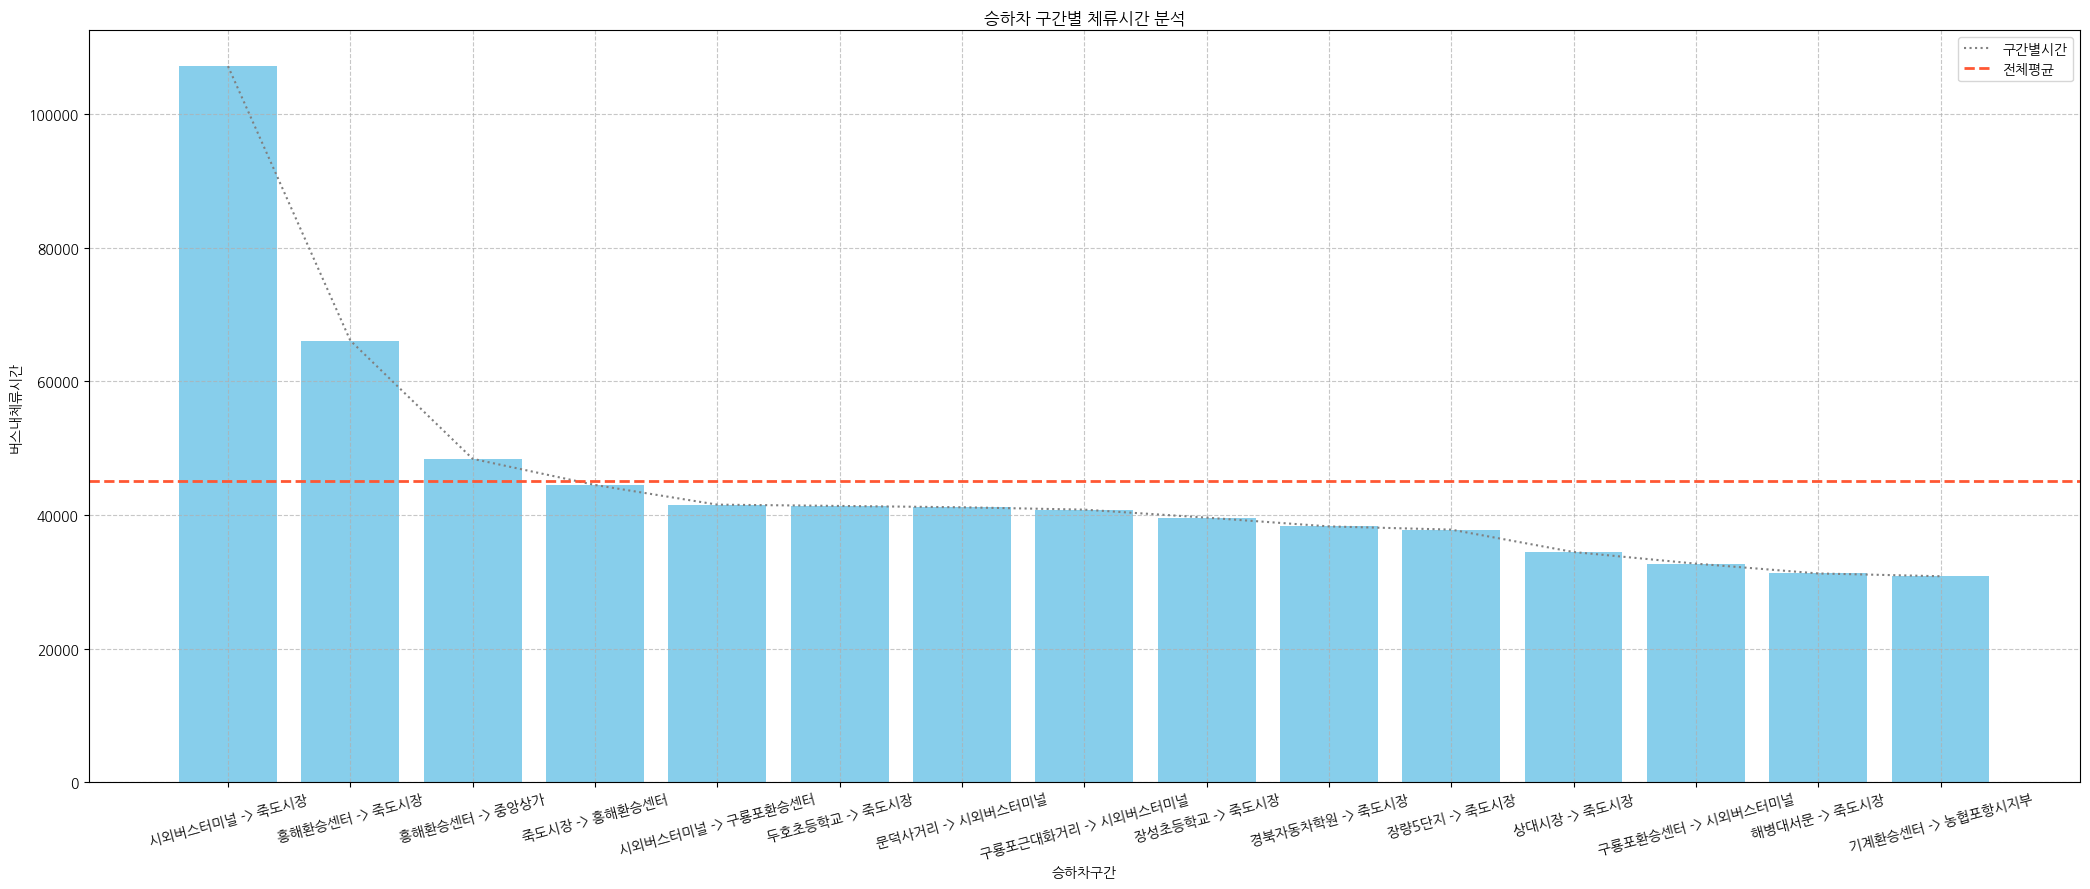

In [142]:
### 그래프 전체 크기 조정 : figsize(너비, 높이)
plt.figure(figsize=(21, 9))

plt.title("승하차 구간별 체류시간 분석")

### 선 그래프 그리기
plt.bar(temp["승하차구간"], temp["버스내체류시간(분)"], color = "skyblue") 
plt.plot(temp["승하차구간"], temp["버스내체류시간(분)"], color = "gray", linestyle=':', label = "구간별시간")

### x축 y축 이름 넣기
plt.xlabel("승하차구간")
plt.ylabel("버스내체류시간")

# x축 값 이름 가독성 확보
plt.xticks(rotation=15)

# x축 기준 수평선 추가
plt.axhline(y=45077, color='#FF5733', linestyle='--', linewidth=2, label = "전체평균")

plt.tight_layout()

# 리스트로 범례 목록 정의
plt.legend()

plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

##### 그래프 해석
- 일부 승하차 구간(좌측에 있는 몇 개의 구간)은 체류시간이 평균보다 훨씬 높아 교통 정체가 심하거나, 많은 사람이 머무르는 장소일 가능성이 있음을 예측해볼 수 있음
    - 시외버스터미널 -> 죽도시장, 홍해환승센터 ->, 홍해환승센터 -> 중앙상가, 죽도시장 -> 홍해환승센터 정류장 이름으로 유추 가능함

- 대부분의 구간은 평균 체류시간 근처에서 유지되고 있으며, 오른쪽으로 갈수록 체류시간이 줄어드는 패턴이 보임
- 중앙 평균선보다 높은 구간들은 체류시간이 상대적으로 길어, 개선이 필요한 주요 구간이라고 볼 수 있음

##### 특이점 분석
- 체류시간이 긴 구간을 해소하기 위해서는 교통 운영 최적화, 시설 개선, 승객 분산 전략 등을 생각해볼 수 있음
- 교통 운영 최적화 -> 버스 배차 간격 조정, 신호 최적화, 우회 경로 운영
- 시설 및 인프라 개선 -> 승하차 공간 확장, 대기 공간 및 안내 시스템 개선
- 승객 분산 및 유도 전략 -> 혼잡 시간대 피크 관리, 추가 교통수단 제공, 실시간 교통 정보 제공 